# Proyecto: Análisis Exploratorio de Datos
*Exploratory Data Analysis*

- Fecha de entrega: 19-20 Mayo
- Datos usados: 
- Fuente de los datos: Kaggle.

# Extracción
## Importamos las librerías de Python 📊 

In [73]:
# Librerias usadas
import numpy as np
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import trim_mean


Importamos los datos y los transformamos en un `DataFrame`, un formato para análisis de datos en Python

In [10]:
csv = pd.read_csv("./Data/songs.csv")
# Renonmbramos para mantener la original
data = csv
# Visualizacion de la data
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


-------

# Transformación
## Limpieza de datos 🧽 

**Datos Faltantes**

La primera cosa que revisaremos es si tenemos información faltante, que puedan provocar sesgos o escondan información.

In [22]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
artist,0,0.0
song,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0


*Tenemos todos los campos llenos*

Pero visualicemos mejor la calidad de la información.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


**Estándarizar los datos**

Vamos a empezar con la columna de `explicit`, asignando $1$ o $0$ según sea el caso

In [16]:
data['explicit'] = [1 if nc else 0 for nc in data['explicit']]
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Pasamos milisegundos a minutos

In [17]:
data['duration_ms'] = data['duration_ms']/60000
data.columns = ['artist', 'song', 'duration_min', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre']

In [18]:
data.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,3.519333,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,2.784433,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,4.175767,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,3.741550,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,3.342667,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Vamos a modificar la columna de `genre` para asignarle un valor numérico.

In [151]:
df_genre = data['genre'].value_counts()
df_genre

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
rock, metal                        38
pop, latin                         28
pop, rock                          26
set()                              22
hip hop, Dance/Electronic          16
latin                              15
pop, rock, metal                   14
hip hop, pop, latin                14
R&B                                13
pop, rock, Dance/Electronic        13
country                            10
metal                               9
hip hop, pop, rock                  9
pop, Folk/Acoustic                  8
pop, country                        8
rock, pop, Dance/Electronic         8
pop, R&B, Da

In [152]:
df_genre = df_genre.to_frame(name='num_repet')
df_genre = df_genre[df_genre['num_repet'] > 4]
list_genre = df_genre.index
list_genre

Index(['pop', 'hip hop, pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic',
       'pop, R&B', 'hip hop', 'hip hop, pop, Dance/Electronic', 'rock',
       'rock, pop', 'Dance/Electronic', 'rock, metal', 'pop, latin',
       'pop, rock', 'set()', 'hip hop, Dance/Electronic', 'latin',
       'pop, rock, metal', 'hip hop, pop, latin', 'R&B',
       'pop, rock, Dance/Electronic', 'country', 'metal', 'hip hop, pop, rock',
       'pop, Folk/Acoustic', 'pop, country', 'rock, pop, Dance/Electronic',
       'pop, R&B, Dance/Electronic'],
      dtype='object')

Eliminamos aquellos géneros que aparecen menos de 3 veces

In [137]:
# filtro
data = data[data['genre'].isin(list_genre)]

In [165]:
corr = data.corr()
corr

,duration_min,explicit,year,popularity,danceability,key,loudness,speechiness,acousticness,liveness,valence,tempo,genre
duration_min,1.000000,0.126275,-0.321091,0.052751,-0.057371,-0.000304,-0.079826,0.068881,0.012735,0.035138,-0.111095,-0.035667,-0.015371
explicit,0.126275,1.000000,0.073560,0.047565,0.246519,0.004335,-0.095207,0.421726,-0.027420,0.010717,-0.046835,0.010436,-0.127072
year,-0.321091,0.073560,1.000000,-0.010391,0.027645,0.004460,0.013258,-0.002120,0.041634,-0.029307,-0.217363,0.076064,-0.046409
popularity,0.052751,0.047565,-0.010391,1.000000,-0.003309,0.016821,0.031953,0.018748,0.020302,0.002033,-0.012832,0.015524,0.004482
danceability,-0.057371,0.246519,0.027645,-0.003309,1.000000,0.027128,-0.040727,0.143708,-0.066578,-0.130970,0.399753,-0.178158,-0.113371
key,-0.000304,0.004335,0.004460,0.016821,0.027128,1.000000,-0.014567,0.008602,0.002480,-0.036216,0.035215,-0.001940,-0.003761
loudness,-0.079826,-0.095207,0.013258,0.031953,-0.040727,-0.014567,1.000000,-0.082237,-0.302369,0.104227,0.228105,0.076045,0.039503
speechiness,0.068881,0.421726,-0.002120,0.018748,0.143708,0.008602,-0.082237,1.000000,-0.009544,0.061264,0.073547,0.058168,-0.103390
acousticness,0.012735,-0.027420,0.041634,0.020302,-0.066578,0.002480,-0.302369,-0.009544,1.000000,-0.114984,-0.126948,-0.093826,-0.012564
liveness,0.035138,0.010717,-0.029307,0.002033,-0.130970,-0.036216,0.104227,0.061264,-0.114984,1.000000,0.013466,0.032653,0.017660


Podemos ver así la relación entre más alta entre los datos de `loudness` y `energy` por lo que podríamos tener la hiótesis de que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

De acuerdo a lo anterior, entre `energy` y `loudness` tomaremos solo una columna.
También eliminaremos columnas que no nos son útiles: `artist`, `song`, `mode`, `instrumentalness`


In [161]:
data = data.drop(['artist', 'song', 'energy', 'mode', 'instrumentalness'], axis = 1)

Cambiamos los valores en la columna `genre` a una escala numérica

In [169]:
value_genre = [i for i in range(len(list_genre))]
dict_genre = dict(zip(list_genre, value_genre))
data = data.replace(dict_genre)

**Data final**

In [168]:
data.head()

,duration_min,explicit,year,popularity,danceability,key,loudness,speechiness,acousticness,liveness,valence,tempo,genre
0,3.519333,0,2000,77,0.751,1,-5.444,0.0437,0.3000,0.3550,0.894,95.053,0
1,2.784433,0,1999,79,0.434,0,-4.918,0.0488,0.0103,0.6120,0.684,148.726,8
2,4.175767,0,1999,66,0.529,7,-9.007,0.0290,0.1730,0.2510,0.278,136.859,24
3,3.741550,0,2000,78,0.551,0,-4.063,0.0466,0.0263,0.3470,0.544,119.992,10
4,3.342667,0,2000,65,0.614,8,-4.806,0.0516,0.0408,0.0845,0.879,172.656,0


-----------

# Estadísticos descriptivos
## Exploremos los datos 🔍 

- Tenemos un DataFrame de por **18 columnas** (variables) y **2000 filas** (datos).
- En el csv tenemos datos categóricos (`artist`,`song` o `genre`) y datos cuantitativos (discretos `duration_ms`, boleanos `explicit`, continuos `danceability`, por ejemplo).
- Nuestra información no presenta datos nulos, por lo que en un inicio podemos usar toda la información.

In [170]:
data.describe()

,duration_min,explicit,year,popularity,danceability,key,loudness,speechiness,acousticness,liveness,valence,tempo,genre
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,3.812650,0.279631,2009.548999,59.908671,0.668906,5.385839,-5.501802,0.103930,0.127179,0.181597,0.551298,120.297552,4.281170
std,0.652743,0.448933,5.857241,21.342250,0.140242,3.618757,1.912386,0.096162,0.170447,0.140444,0.220995,27.041058,5.221378
min,1.883333,0.000000,1998.000000,0.000000,0.129000,0.000000,-20.514000,0.023200,0.000019,0.021500,0.038100,60.019000,0.000000
25%,3.400000,0.000000,2005.000000,56.000000,0.583000,2.000000,-6.490000,0.039600,0.014000,0.088400,0.387000,98.992000,1.000000
50%,3.721550,0.000000,2010.000000,66.000000,0.678000,6.000000,-5.280000,0.060300,0.055900,0.125000,0.557000,120.041000,3.000000
75%,4.134433,1.000000,2015.000000,73.000000,0.765000,8.000000,-4.167000,0.131000,0.176000,0.242000,0.730000,134.945000,5.000000
max,8.069100,1.000000,2020.000000,89.000000,0.975000,11.000000,-0.276000,0.576000,0.976000,0.843000,0.973000,210.851000,26.000000


**¿Qué información obtenemos?**

- *La duración promedio de las canciones es de $3.8$ minutos*
- *El año promedio de lanzamiento es $2009$, lo que tiene sentido viendo que el rango de años va de 1998 y 2020*
- *El promedio del tempo de las canciones, es de $120$ bpm. Cada estilo y género musical está asociado a un ritmo, por lo cual teóricamente cada género tiene su propio Tempo es decir “su propio” BPM, el valor de 120 bpm, suele relacionarse a la música electrónica.*

Si quisieramos ver más fácilmente la correlación con una variable, por ejemplo `popularity`, podemos apoyarnos en el siguiente gráfico

In [171]:
corr[['popularity']].sort_values(by = 'popularity',ascending = False).style.background_gradient()

,popularity
popularity,1.000000
duration_min,0.052751
explicit,0.047565
loudness,0.031953
acousticness,0.020302
speechiness,0.018748
key,0.016821
tempo,0.015524
genre,0.004482
liveness,0.002033


Dado que ninguna variable está tan fuertemente correlacionada con `popularity`, puede que estos datos no nos darían la información suficiente para hacer un modelo que pronostique la popularidad de una canción.

Podemos ver la información en otras tablas, en este caso una tabla que por año nos muestre la valencia media de las canciones. Por lo que vemos, en el año $2001$ las canciones promediaron el máximo valor que fue de $0.661041$ y en $2018$ se ha tenido el mínimo con $0.467215$.

In [172]:
tabla = data.groupby('year').agg({'valence': ['min','mean','max']})
tabla

valence                 
         min      mean    max
year                         
1998  0.5270  0.527000  0.527
1999  0.0783  0.561119  0.961
2000  0.2060  0.659986  0.973
2001  0.0824  0.665630  0.969
2002  0.1000  0.577034  0.966
2003  0.0681  0.617498  0.965
2004  0.0596  0.611432  0.973
2005  0.0800  0.545510  0.966
2006  0.1400  0.600663  0.964
2007  0.0406  0.560377  0.972
2008  0.0756  0.543037  0.972
2009  0.0942  0.568820  0.968
2010  0.0784  0.567870  0.957
2011  0.0886  0.536604  0.965
2012  0.0694  0.564932  0.965
2013  0.0381  0.486828  0.952
2014  0.1040  0.508343  0.962
2015  0.0883  0.488157  0.964
2016  0.0594  0.479659  0.907
2017  0.0793  0.486331  0.966
2018  0.1120  0.467215  0.877
2019  0.1010  0.530241  0.952
2020  0.3810  0.429500  0.478

Tomemos la columna de `danceability` para calcular algunos *estimates of location*

In [173]:
print('La media del nivel de danceability es:', data['danceability'].mean())
print('La mediana del nivel de danceability es:', data['danceability'].median())
print('La media recortada del nivel de danceability es:', trim_mean(data['danceability'],0.1))

La media del nivel de danceability es: 0.6689061056952282
La mediana del nivel de danceability es: 0.678
La media recortada del nivel de danceability es: 0.6748699551569507


Como ya calculamos la matriz de correlación, podemos ahora verla incluso en un gráfico

<AxesSubplot:>

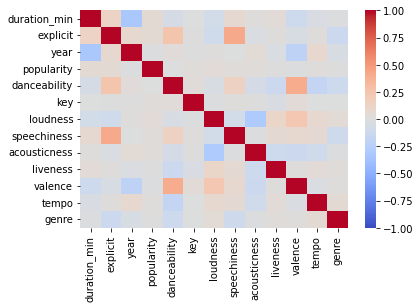

In [174]:
sns.heatmap(data.corr(), vmin = -1, vmax = +1, cmap = 'coolwarm')

--------------

## Preguntas planteadas 🤔

1. ¿Cuáles son las 10 canciones más populares?

In [22]:
data.nlargest(10,'popularity')

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,4.006667,0,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,4.072667,1,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,4.838667,1,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,4.736667,1,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1613,WILLOW,Wait a Minute!,3.275333,0,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),3.336417,0,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),3.336417,0,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
209,Eminem,'Till I Collapse,4.963100,1,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,hip hop
1227,Bruno Mars,Locked out of Heaven,3.891300,0,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1304,Bruno Mars,Locked out of Heaven,3.891300,0,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop


2. ¿Cuáles son los géneros más repetidos?

In [29]:
genres = pd.DataFrame(data['genre'].value_counts().head(10))
genres

,genre
pop,428
"hip hop, pop",277
"hip hop, pop, R&B",244
"pop, Dance/Electronic",221
"pop, R&B",178
hip hop,124
"hip hop, pop, Dance/Electronic",78
rock,58
"rock, pop",43
Dance/Electronic,41


<AxesSubplot:>

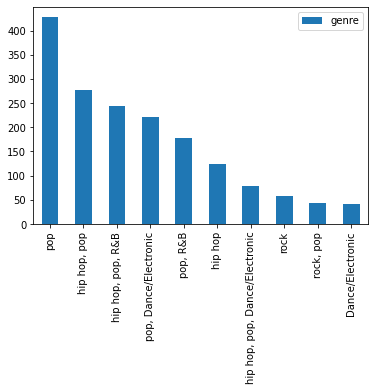

In [28]:
genres.plot(kind='bar')